In [1]:
from SmilesEnumerator import SmilesEnumerator
sme = SmilesEnumerator()
print(help(SmilesEnumerator))

Help on class SmilesEnumerator in module SmilesEnumerator:

class SmilesEnumerator(builtins.object)
 |  SmilesEnumerator(charset='@C)(=cOn1S2/H[N]\\', pad=120, leftpad=True, isomericSmiles=True, enum=True, canonical=False)
 |
 |  SMILES Enumerator, vectorizer and devectorizer
 |
 |  #Arguments
 |      charset: string containing the characters for the vectorization
 |        can also be generated via the .fit() method
 |      pad: Length of the vectorization
 |      leftpad: Add spaces to the left of the SMILES
 |      isomericSmiles: Generate SMILES containing information about stereogenic centers
 |      enum: Enumerate the SMILES during transform
 |      canonical: use canonical SMILES during transform (overrides enum)
 |
 |  Methods defined here:
 |
 |  __init__(self, charset='@C)(=cOn1S2/H[N]\\', pad=120, leftpad=True, isomericSmiles=True, enum=True, canonical=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  fit(self, smiles, extra_chars=[], extr

In [2]:
import sys
print(sys.version)

3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


In [3]:
import torch
print(torch.version.cuda)
print(torch.backends.cudnn.version())

12.1
90100


random作用：生成一样（等效）但是表示不同的分子。比如"CCCC"，"CC(C)C"

In [3]:
for i in range(10):
    print(sme.randomize_smiles("CCC(=O)O[C@@]1(CC[NH+](C[C@H]1CC=C)C)c2ccccc2"))

CCC(=O)O[C@@]1(c2ccccc2)[C@H](CC=C)C[NH+](C)CC1
[NH+]1(C)C[C@@H](CC=C)[C@](c2ccccc2)(OC(CC)=O)CC1
CCC(=O)O[C@@]1(c2ccccc2)[C@H](CC=C)C[NH+](C)CC1
[C@@]1(OC(=O)CC)(c2ccccc2)CC[NH+](C)C[C@H]1CC=C
c1cc([C@]2(OC(CC)=O)[C@H](CC=C)C[NH+](C)CC2)ccc1
[C@@H]1(CC=C)C[NH+](C)CC[C@]1(OC(CC)=O)c1ccccc1
c1c([C@]2(OC(CC)=O)[C@H](CC=C)C[NH+](C)CC2)cccc1
C(=C)C[C@@H]1C[NH+](C)CC[C@@]1(c1ccccc1)OC(CC)=O
C1[C@@H](CC=C)[C@@](OC(CC)=O)(c2ccccc2)CC[NH+]1C
c1cc([C@]2(OC(CC)=O)[C@H](CC=C)C[NH+](C)CC2)ccc1


sme.fit（）用于提取数组的字典和最大填充长度（即里面最多的这个字符数）保证字符长度一样

In [4]:
import numpy as np
smiles = np.array(["CCC(=O)O[C@@]1(CC[NH+](C[C@H]1CC=C)C)c2ccccc2"])
print(smiles.shape)

(1,)


In [7]:
sme.fit(smiles)
print(sme.charset)
print("Number of characters in charset:", len(sme.charset))
print(sme.pad)

[HC]@+(NO=)c12
Number of characters in charset: 14
50


Shape of the vectorized matrix: (1, 50, 14)


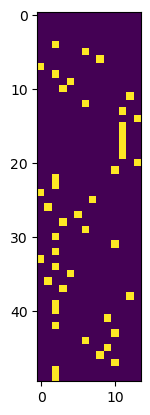

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
vect = sme.transform(smiles)
print("Shape of the vectorized matrix:", vect.shape)
plt.imshow(vect[0])

enumerate是否随机化？
canonical是否标准化？
请注意，当时标准化时会强制不随机

True False


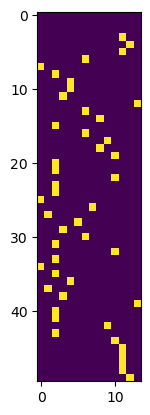

In [9]:
print(sme.enumerate, sme.canonical)
vect = sme.transform(smiles)
plt.imshow(vect[0])


With enumerate=False, canonical=True:
Charset: [HC]@+(NO=)c12
Number of characters in charset: 14
Shape of the vectorized matrix: (1, 50, 14)


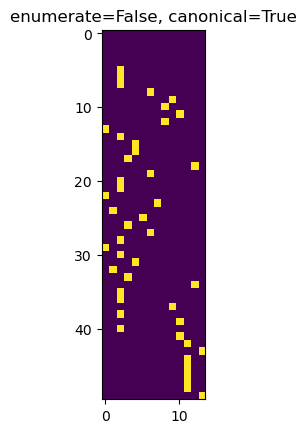


With enumerate=True, canonical=True:
Charset: [HC]@+(NO=)c12
Number of characters in charset: 14
Shape of the vectorized matrix: (1, 50, 14)


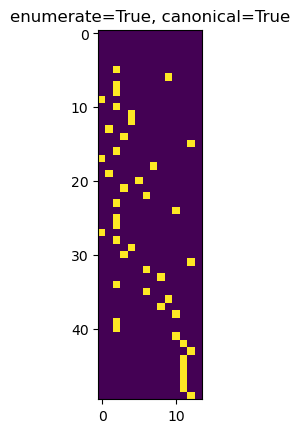

In [10]:
# 设置 enumerate=False, canonical=True
sme.enumerate = False
sme.canonical = True

# 使用 transform 方法将 SMILES 转换为向量化矩阵并可视化
vect = sme.transform(smiles)
print("\nWith enumerate=False, canonical=True:")
print("Charset:", sme.charset)
print("Number of characters in charset:", len(sme.charset))
print("Shape of the vectorized matrix:", vect.shape)
plt.imshow(vect[0])
plt.title("enumerate=False, canonical=True")
plt.show()

# 设置 enumerate=True, canonical=True
sme.enumerate = True
sme.canonical = True

# 使用 transform 方法将 SMILES 转换为向量化矩阵并可视化
vect = sme.transform(smiles)
print("\nWith enumerate=True, canonical=True:")
print("Charset:", sme.charset)
print("Number of characters in charset:", len(sme.charset))
print("Shape of the vectorized matrix:", vect.shape)
plt.imshow(vect[0])
plt.title("enumerate=True, canonical=True")
plt.show()

In [11]:
print(sme.reverse_transform(vect))

['C=CC[C@@H]1C[NH+](C)CC[C@]1(OC(=O)CC)c1ccccc1']


In [13]:
import pandas as pd

data = pd.read_csv("Example_data/Sutherland_DHFR.csv")
print(data.head(6))

   Unnamed: 0                                      smiles_parent PC_uM_sign  \
0           0                      CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1        NaN   
1           1                  CCc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1        NaN   
2           2                   Cc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1        NaN   
3           3                CCOCc1nc(N)nc(N)c1-c1ccc(Cl)c(Cl)c1        NaN   
4           4  Nc1nc(N)c(-c2ccc(Cl)cc2)c(COc2ccc([N+](=O)[O-]...        NaN   
5           5      Nc1nc(N)c(-c2ccc(Cl)c(Cl)c2)c(C=CCc2ccccc2)n1        NaN   

   PC_uM_value  
0         3.70  
1         1.08  
2         1.68  
3        12.70  
4        85.10  
5         0.50  
